# Investigating KwaDela: May 2016 Analysis
-----------------------------------------------------

### Data Science 2016 Final Project
Mackenzie Frackleton

Brenna Manning

Olin College of Engineering

#### Initial Proposal
The key ideas of this project are to work with an external collaborator to understand a data set. We are also looking to work with a time course data series in this project; we need to find the best way to examine data in a temporal dimension and not misrepresent with values that gather multi-week spanning data into one misleading value (non meaningful means for example). We’ve both also done a fair bit of work with data visualization and are looking to enhance the experience by finding effective techniques for representing data across time. We’re hoping we can look at existing journal articles and other peer-reviewed documents for inspiration on appropriate visualization techniques. We haven’t used much of what we have discussed in Thinkstats2 in projects yet, so we are now looking to apply these statistics techniques for comparing time course datasets (we do not yet know what these conventions are) to our data-heavy project. The MVP for this project would be well documented code with visualizations to make data relationships more clear in order to further data analysis.

### Imports, loading and cleaning data, defining functions to be used later.

In [63]:
#IMPORTS
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
import numpy as np
import pprint as pp
from IPython.display import display
import scipy.stats as stats

#LOAD DATA FROM CSVs FROM CSVBUILDER
df2013 = pd.read_csv('Kwadela_winter_2013_cleaned.csv')
df2014 = pd.read_csv('Kwadela_winter_2014_cleaned.csv')


#### Helper Functions

In [163]:
#SOME HELPER FUNCTIONS


def get_datetime(s):
    #gets date objects from the date column of the csv
    dt = datetime.strptime(s, "%m/%d/%y %H:%M")
    return dt

def daysSinceStart(df):
    #Get time since epoch
    dayArray = np.array(df.Day)
    monthArray = np.array(df.Month)
    
    runningDays = []
    for day, month in zip(dayArray, monthArray):
        if month == 7:
            total_days = 0
            #do nothing, append the normal day
        elif month == 8:
            total_days = 31 
        elif month == 9:
            total_days = 61
        else:
            raise ValueError 
        total_days = total_days + day
        #print'tot days:', total_days, month, day
        runningDays.append(total_days)
    df['DayCount'] = pd.Series(runningDays, index = df.index)
    return df


#Daily Average Temperature

def compute_avg_vals(df):
    #computes average temperature of each day in a dataframe
    df['DailyAverageTemp'] = df['Temperature_(degC)'].mean()
    df['DailyAverageTempH01KE'] = df['H01-K-E'].mean()
    #computes avg indoor temp: takes in a dataframe and returns a dataframe with a new column
    #Removed: df['H07-K-S'].mean() because it's mostly just Nans
    df['AvgHouse'] = (df['H01-K-E'].mean()+ df['H02-K-N'].mean() + df['H03-K-S'].mean()+ df['H04-K-S'].mean())/4
    #df['DailyAvgHouse']= df['AvgHouse'].mean()
    #Dusttraks/PM4
    df['DailyAvgDusttraks'] = df['Dusttraks_(mg/m3)'].mean()
    df['DailyAvgPM4'] = df['PM4_(ug/m3)'].mean()
    return df


def tempdifference(df, house):
    # given a dataframe and a home, computes a column of the difference in temperature between that house and outside
    df['tempdifference'] = df[house]
    df['tempdifference'] = df[house]-df['Temperature_(degC)']
    return df


def abcdeTimeDataframes(df):
    #DATAFRAMES FOR GIVEN TIME RANGES
    dfA = df[df['Hour'] < 5]
    dfB = df[df['Hour'] > 4]
    dfB = dfB[dfB['Hour'] <= 9]
    dfC = df[df['Hour'] >9]
    dfC = dfC[dfC['Hour'] <= 14]
    dfD = df[df['Hour'] >14]
    dfD = dfD[dfD['Hour'] <= 21]
    dfE = df[df['Hour'] > 21]
    res = [dfA, dfB, dfC, dfD, dfE]
    return res


#GENERAL FUNCTION FOR DIURNAL DATA

def getmeanfeatureforhour(hourdf, feature):
    #calculates the average value of a feature
    res = hourdf[feature].mean()
    return res
def featurediurnaldata(df, feature):
    #feature for example could be a temperature or pollutant concentration
    dfhour0 = df[df['Hour'] == 0]
    feat0 = getmeanfeatureforhour(dfhour0, feature)
    dfhour1 = df[df['Hour'] == 1]
    feat1= getmeanfeatureforhour(dfhour1, feature)
    dfhour2 = df[df['Hour'] == 2]
    feat2 = getmeanfeatureforhour(dfhour2, feature)
    dfhour3 = df[df['Hour'] == 3]
    feat3 = getmeanfeatureforhour(dfhour3, feature)
    dfhour4 = df[df['Hour'] == 4]
    feat4 = getmeanfeatureforhour(dfhour4, feature)
    dfhour5 = df[df['Hour'] == 5]
    feat5 = getmeanfeatureforhour(dfhour5, feature)
    dfhour6 = df[df['Hour'] == 6]
    feat6 = getmeanfeatureforhour(dfhour6, feature)
    dfhour7 = df[df['Hour'] == 7]
    feat7 = getmeanfeatureforhour(dfhour7, feature)
    dfhour8 = df[df['Hour'] == 8]
    feat8 = getmeanfeatureforhour(dfhour8, feature)
    dfhour9 = df[df['Hour'] == 9]
    feat9 = getmeanfeatureforhour(dfhour9, feature)
    dfhour10 = df[df['Hour'] == 10]
    feat10 = getmeanfeatureforhour(dfhour10, feature)
    dfhour11 = df[df['Hour'] == 11]
    feat11 = getmeanfeatureforhour(dfhour11, feature)
    dfhour12 = df[df['Hour'] == 12]
    feat12 = getmeanfeatureforhour(dfhour12, feature)
    dfhour13 = df[df['Hour'] == 13]
    feat13 = getmeanfeatureforhour(dfhour13, feature)
    dfhour14 = df[df['Hour'] == 14]
    feat14 = getmeanfeatureforhour(dfhour14, feature)
    dfhour15 = df[df['Hour'] == 15]
    feat15 = getmeanfeatureforhour(dfhour15, feature)
    dfhour16 = df[df['Hour'] == 16]
    feat16 = getmeanfeatureforhour(dfhour16, feature)
    dfhour17 = df[df['Hour'] == 17]
    feat17 = getmeanfeatureforhour(dfhour17, feature)
    dfhour18 = df[df['Hour'] == 18]
    feat18 = getmeanfeatureforhour(dfhour18, feature)
    dfhour19 = df[df['Hour'] == 19]
    feat19 = getmeanfeatureforhour(dfhour19, feature)
    dfhour20 = df[df['Hour'] == 20]
    feat20 = getmeanfeatureforhour(dfhour20, feature)
    dfhour21 = df[df['Hour'] == 21]
    feat21 = getmeanfeatureforhour(dfhour21, feature)
    dfhour22 = df[df['Hour'] == 22]
    feat22 = getmeanfeatureforhour(dfhour22, feature)
    dfhour23 = df[df['Hour'] == 23]
    feat23 = getmeanfeatureforhour(dfhour23, feature)

    featlist = [feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23]
    return featlist



def preprocess(df):
    #set hour, day, month, year values from datetime. Apply dusttracks correction factor of 0.14
    res = df.copy()
    if hasattr(res, 'Date'):
        datetimes = res.Date.apply(get_datetime)
        res['Hour'] = datetimes.apply(lambda dt: dt.hour)
        res['Day'] = datetimes.apply(lambda dt: dt.day)
        res['Month'] = datetimes.apply(lambda dt: dt.month)
        res['Year'] = datetimes.apply(lambda dt: dt.year)
    res = daysSinceStart(res)
    res = tempdifference(res, 'H02-K-N')
    res['Dusttraks_(mg/m3)']= res['Dusttraks_(mg/m3)']*0.14
    res['PM4_(ug/m3)']=res['Dusttraks_(mg/m3)']*1000
    grouped = res.groupby('DayCount')
    res = grouped.apply(compute_avg_vals)
    return res




### Preprocess our dataframes
##### Get Hour, Day, Month, Year from Date object, apply Dusttraks correction factor, and create PM4 column with same units as PM2.5 & PM10


In [90]:
#PREPROCESS OUR DATAFRAMES
df2013 = preprocess(df2013)
df2014 = preprocess(df2014)

## First, we will examine just the 2013 data

### Data Over Entire Winter

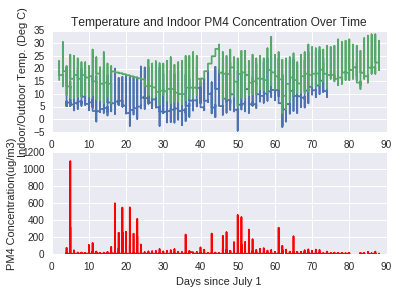

In [91]:
plt.figure(1)

plt.subplot(211)
plt.title('Temperature and Indoor PM4 Concentration Over Time')
plt.plot(df2013['DayCount'], df2013['Temperature_(degC)'])
plt.plot(df2013['DayCount'], df2013['H01-K-E'])
plt.ylabel('Indoor/Outdoor Temp. (Deg C)')

plt.subplot(212)
plt.plot(df2013['DayCount'], df2013['PM4_(ug/m3)'], '-r')
plt.xlabel('Days since July 1')
plt.ylabel('PM4 Concentration(ug/m3)')
plt.show()

This visualization above is noisy and unclear. By taking the average temperature/concentration of each day of the winter and plotting that, we can see the trends over the course of the winter.

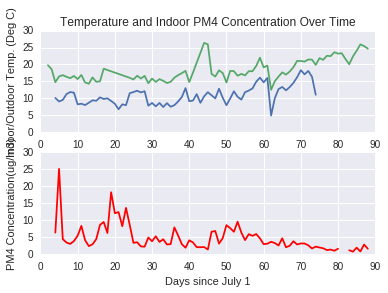

In [92]:
#By Daily Averages
plt.figure(1)

plt.subplot(211)
plt.title('Temperature and Indoor PM4 Concentration Over Time')
plt.plot(df2013['DayCount'], df2013['DailyAverageTemp'])
plt.plot(df2013['DayCount'], df2013['DailyAverageTempH01KE'])
plt.ylabel('Indoor/Outdoor Temp. (Deg C)')

plt.subplot(212)
plt.plot(df2013['DayCount'], df2013['DailyAvgPM4'], '-r')
plt.xlabel('Days since July 1')
plt.ylabel('PM4 Concentration(ug/m3)')
plt.show()

### Diurnal Profiles of the Data
Because the pollution is coming from coal burning within homes, which is influenced by daily routines, we see more meaningful trends when we examine this data diurnally. 

In [93]:
#0-23 Hours of the day to use as x-axis for diurnal visualizations.
hourlist = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

Outdoor Temperature over the course of an average day

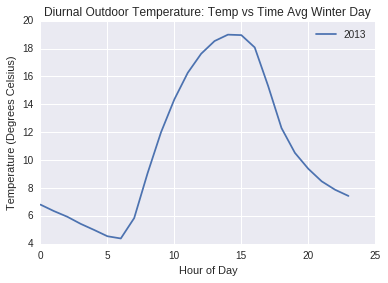

In [94]:
plt.plot(hourlist, featurediurnaldata(df2013, 'Temperature_(degC)'))
plt.legend(['2013'])
plt.title('Diurnal Outdoor Temperature: Temp vs Time Avg Winter Day')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature (Degrees Celsius)')
plt.show()

Indoor Temperature over the course of an average day for four different houses

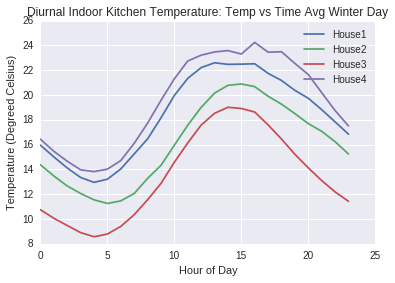

In [95]:
plt.plot(hourlist, featurediurnaldata(df2013, 'H01-K-E'))
plt.plot(hourlist, featurediurnaldata(df2013, 'H02-K-N'))
plt.plot(hourlist, featurediurnaldata(df2013, 'H03-K-S'))
plt.plot(hourlist, featurediurnaldata(df2013, 'H04-K-S'))

plt.legend(['House1', 'House2', 'House3', 'House4'])
plt.title('Diurnal Indoor Kitchen Temperature: Temp vs Time Avg Winter Day')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature (Degreed Celsius)')
plt.show()

Difference between indoor and outdoor temperature over the course of a day

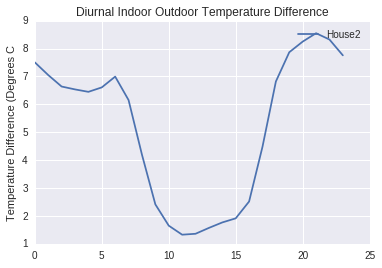

In [96]:
plt.plot(hourlist, featurediurnaldata(df2013, 'tempdifference'))
plt.title('Diurnal Indoor Outdoor Temperature Difference')
plt.legend(['House2'])
plt.ylabel('Temperature Difference (Degrees C')
plt.show()

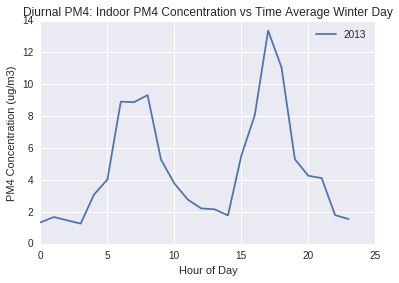

In [97]:
plt.plot(hourlist, featurediurnaldata(df2013, 'PM4_(ug/m3)'))
plt.legend(['2013'])
plt.title('Diurnal PM4: Indoor PM4 Concentration vs Time Average Winter Day')
plt.xlabel('Hour of Day')
plt.ylabel('PM4 Concentration (ug/m3)')
plt.show()

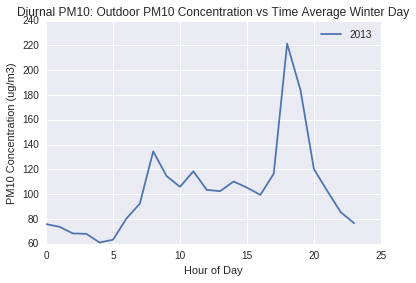

In [98]:
plt.plot(hourlist, featurediurnaldata(df2013, 'PM10_(ug/m3)'))
plt.legend(['2013'])
plt.title('Diurnal PM10: Outdoor PM10 Concentration vs Time Average Winter Day')
plt.xlabel('Hour of Day')
plt.ylabel('PM10 Concentration (ug/m3)')
plt.show()

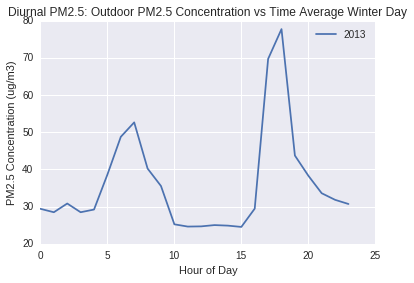

In [99]:
plt.plot(hourlist, featurediurnaldata(df2013, 'PM2.5_(ug/m3)'))
plt.legend(['2013'])
plt.title('Diurnal PM2.5: Outdoor PM2.5 Concentration vs Time Average Winter Day')
plt.xlabel('Hour of Day')
plt.ylabel('PM2.5 Concentration (ug/m3)')
plt.show()

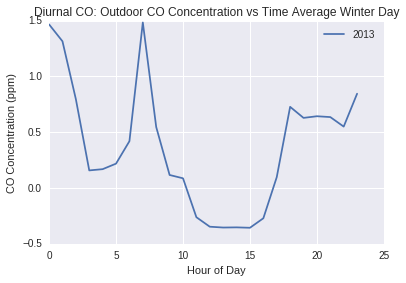

In [111]:
plt.plot(hourlist, featurediurnaldata(df2013, 'CO_(ppm)'))
plt.legend(['2013'])
plt.title('Diurnal CO: Outdoor CO Concentration vs Time Average Winter Day')
plt.xlabel('Hour of Day')
plt.ylabel('CO Concentration (ppm)')
plt.show()

## Compare 2013 & 2014 Data
### Pre Vs Post Intervention

#### Over Entire Winter

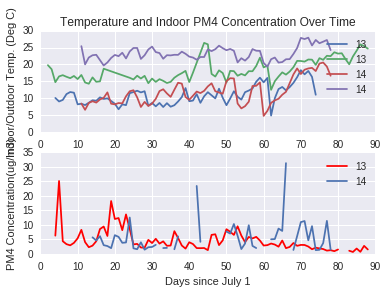

In [112]:
plt.figure(1)

plt.subplot(211)
plt.title('Temperature and Indoor PM4 Concentration Over Time')
plt.plot(df2013['DayCount'], df2013['DailyAverageTemp'])
plt.plot(df2013['DayCount'], df2013['DailyAverageTempH01KE'])
plt.plot(df2014['DayCount'], df2014['DailyAverageTemp'])
plt.plot(df2014['DayCount'], df2014['DailyAverageTempH01KE'])
plt.legend(['13','13', '14', '14'])
plt.ylabel('Indoor/Outdoor Temp. (Deg C)')

plt.subplot(212)
plt.plot(df2013['DayCount'], df2013['DailyAvgPM4'], '-r')
plt.plot(df2014['DayCount'], df2014['DailyAvgPM4'])
plt.legend(['13', '14'])
plt.xlabel('Days since July 1')
plt.ylabel('PM4 Concentration(ug/m3)')

#### Diurnal Profiles

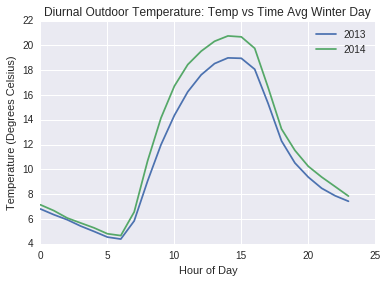

In [113]:
plt.plot(hourlist, featurediurnaldata(df2013, 'Temperature_(degC)'))
plt.plot(hourlist, featurediurnaldata(df2014, 'Temperature_(degC)'))
plt.legend(['2013', '2014'])
plt.title('Diurnal Outdoor Temperature: Temp vs Time Avg Winter Day')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature (Degrees Celsius)')
plt.show()

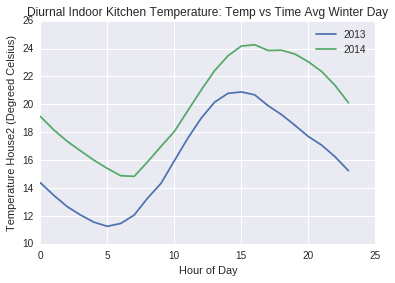

In [114]:
plt.plot(hourlist, featurediurnaldata(df2013, 'H02-K-N'))
plt.plot(hourlist, featurediurnaldata(df2014, 'H02-K-N'))

plt.legend(['2013', '2014'])
plt.title('Diurnal Indoor Kitchen Temperature: Temp vs Time Avg Winter Day')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature House2 (Degreed Celsius)')
plt.show()


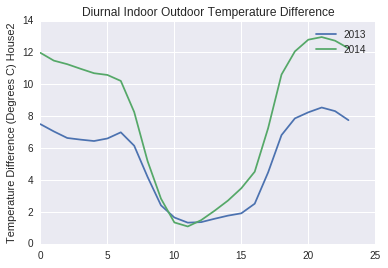

In [115]:
plt.plot(hourlist, featurediurnaldata(df2013, 'tempdifference'))
plt.plot(hourlist, featurediurnaldata(df2014, 'tempdifference'))
plt.title('Diurnal Indoor Outdoor Temperature Difference')
plt.legend(['2013', '2014'])
plt.ylabel('Temperature Difference (Degrees C) House2')
plt.show()

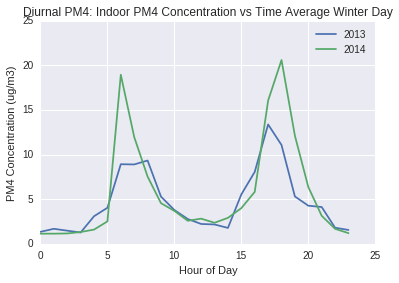

In [116]:
plt.plot(hourlist, featurediurnaldata(df2013, 'PM4_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014, 'PM4_(ug/m3)'))
plt.legend(['2013', '2014'])
plt.title('Diurnal PM4: Indoor PM4 Concentration vs Time Average Winter Day')
plt.xlabel('Hour of Day')
plt.ylabel('PM4 Concentration (ug/m3)')
plt.show()

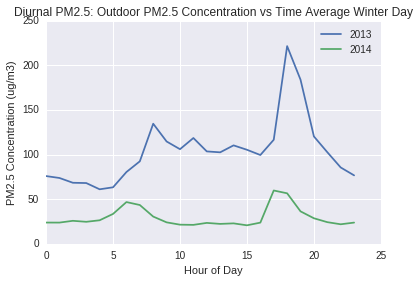

In [117]:
plt.plot(hourlist, featurediurnaldata(df2013, 'PM10_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014, 'PM2.5_(ug/m3)'))
plt.legend(['2013', '2014'])
plt.title('Diurnal PM2.5: Outdoor PM2.5 Concentration vs Time Average Winter Day')
plt.xlabel('Hour of Day')
plt.ylabel('PM2.5 Concentration (ug/m3)')
plt.show()

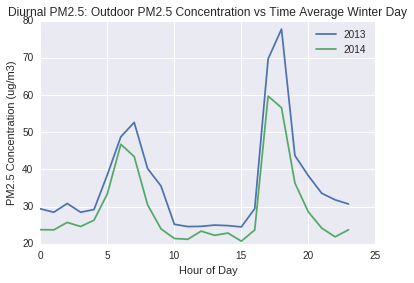

In [118]:
plt.plot(hourlist, featurediurnaldata(df2013, 'PM2.5_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014, 'PM2.5_(ug/m3)'))
plt.legend(['2013', '2014'])
plt.title('Diurnal PM2.5: Outdoor PM2.5 Concentration vs Time Average Winter Day')
plt.xlabel('Hour of Day')
plt.ylabel('PM2.5 Concentration (ug/m3)')
plt.show()

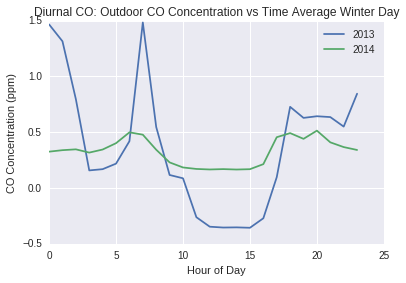

In [120]:
plt.plot(hourlist, featurediurnaldata(df2013, 'CO_(ppm)'))
plt.plot(hourlist, featurediurnaldata(df2014, 'CO_(ppm)'))
plt.legend(['2013', '2014'])
plt.title('Diurnal CO: Outdoor CO Concentration vs Time Average Winter Day')
plt.xlabel('Hour of Day')
plt.ylabel('CO Concentration (ppm)')
plt.show()

### Separate days into temperature brackets: warm, medium, and cold days.

These will be used to draw comparisons between 2013 and 2014. We want to set cutoff temperatures for these brackets so 2013 and 2014 will be comparable.
To find these cutoff temperatures, we found the IQR brackets of outdoor temperature for each year, and used the quartile cutoff temperatures of the warmer year, so that both will have at least 25% of their days counted as cold days.

2014 was the warmer year, so cold days are defined as days in either 2013 or 2014 where the average temperature that day was colder than 25% of days in 2014.

In [124]:
df2013median = df2013['DailyAverageTemp'].median()
df2013abovemed = df2013[df2013['DailyAverageTemp'] > df2013median]
df2013belowmed = df2013[df2013['DailyAverageTemp'] < df2013median]
df2013Q3cutoff = df2013abovemed['DailyAverageTemp'].median()
df2013Q1cutoff = df2013belowmed['DailyAverageTemp'].median()

df2014median = df2014['DailyAverageTemp'].median()
df2014abovemed = df2014[df2014['DailyAverageTemp'] > df2014median]
df2014belowmed = df2014[df2014['DailyAverageTemp'] < df2014median]
df2014Q3cutoff = df2014abovemed['DailyAverageTemp'].median()
df2014Q1cutoff = df2014belowmed['DailyAverageTemp'].median()

print ('2013 cold temp cutoff = ')
print (df2013Q1cutoff)
print('2014 cold temp cutoff = ')
print(df2014Q1cutoff)
print('2014 warm temp cutoff')
print(df2014Q3cutoff)

2013 cold temp cutoff = 
8.6259
2014 cold temp cutoff = 
8.71066111111
2014 warm temp cutoff
14.4178590278


We will from now on define warm days as days where the average outdoor temperature is above 14.4179 Degrees C, and cold days as days where the average outdoor temperature is below 8.7107 Degrees C.

In [126]:
df2013cold = df2013[df2013['DailyAverageTemp'] <= df2014Q1cutoff]
df2013mid = df2013[df2013['DailyAverageTemp'] > df2014Q1cutoff]
df2013mid = df2013mid[df2013mid['DailyAverageTemp'] < df2014Q3cutoff]
df2013warm = df2013[df2013['DailyAverageTemp'] >= df2014Q3cutoff]
df2014cold = df2014[df2014['DailyAverageTemp'] <= df2014Q1cutoff]
df2014mid = df2014[df2014['DailyAverageTemp'] > df2014Q1cutoff]
df2014mid = df2014mid[df2014mid['DailyAverageTemp'] < df2014Q3cutoff]
df2014warm = df2014[df2014['DailyAverageTemp'] >= df2014Q3cutoff]

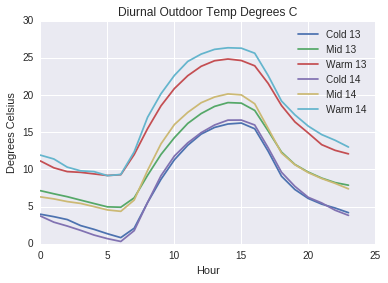

In [129]:
plt.plot(hourlist, featurediurnaldata(df2013cold, 'Temperature_(degC)'))
plt.plot(hourlist, featurediurnaldata(df2013mid, 'Temperature_(degC)'))
plt.plot(hourlist, featurediurnaldata(df2013warm, 'Temperature_(degC)'))
plt.plot(hourlist, featurediurnaldata(df2014cold, 'Temperature_(degC)'))
plt.plot(hourlist, featurediurnaldata(df2014mid, 'Temperature_(degC)'))
plt.plot(hourlist, featurediurnaldata(df2014warm, 'Temperature_(degC)'))         
      
plt.legend(['Cold 13', 'Mid 13', 'Warm 13', 'Cold 14', 'Mid 14', 'Warm 14'])
plt.title('Diurnal Outdoor Temp Degrees C')
plt.xlabel('Hour')
plt.ylabel('Degrees Celsius')
plt.show()

With these temperature  brackets, the 2013 and 2014 data, particularly for the cold days is comparable diurnally, and we can now compare cold and warm days to each other.

#### Outdoor Temperature

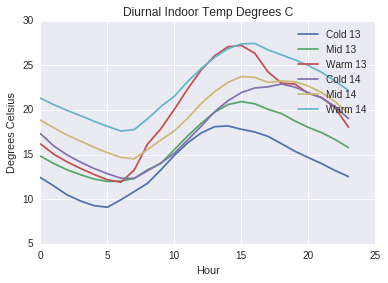

In [130]:
plt.plot(hourlist, featurediurnaldata(df2013cold, 'H02-K-N'))
plt.plot(hourlist, featurediurnaldata(df2013mid, 'H02-K-N'))
plt.plot(hourlist, featurediurnaldata(df2013warm, 'H02-K-N'))
plt.plot(hourlist, featurediurnaldata(df2014cold, 'H02-K-N'))
plt.plot(hourlist, featurediurnaldata(df2014mid, 'H02-K-N'))
plt.plot(hourlist, featurediurnaldata(df2014warm, 'H02-K-N'))         
      
plt.legend(['Cold 13', 'Mid 13', 'Warm 13', 'Cold 14', 'Mid 14', 'Warm 14'])
plt.title('Diurnal Indoor Temp Degrees C')
plt.xlabel('Hour')
plt.ylabel('Degrees Celsius')

plt.show()



#### Indoor Temperature

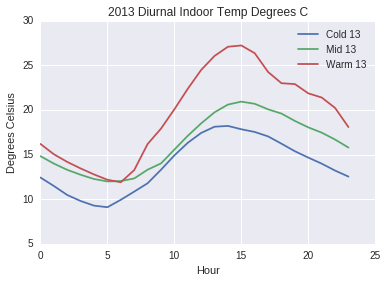

In [131]:
plt.plot(hourlist, featurediurnaldata(df2013cold, 'H02-K-N'))
plt.plot(hourlist, featurediurnaldata(df2013mid, 'H02-K-N'))
plt.plot(hourlist, featurediurnaldata(df2013warm, 'H02-K-N'))      
      
plt.legend(['Cold 13', 'Mid 13', 'Warm 13'])
plt.title('2013 Diurnal Indoor Temp Degrees C')
plt.xlabel('Hour')
plt.ylabel('Degrees Celsius')

plt.show()



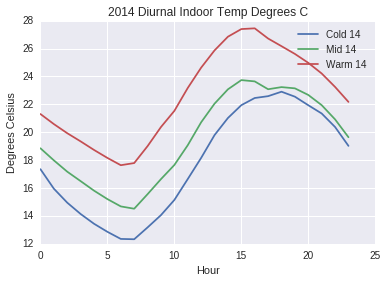

In [132]:
plt.plot(hourlist, featurediurnaldata(df2014cold, 'H02-K-N'))
plt.plot(hourlist, featurediurnaldata(df2014mid, 'H02-K-N'))
plt.plot(hourlist, featurediurnaldata(df2014warm, 'H02-K-N'))      
      
plt.legend(['Cold 14', 'Mid 14', 'Warm 14'])
plt.title('2014 Diurnal Indoor Temp Degrees C')
plt.xlabel('Hour')
plt.ylabel('Degrees Celsius')

plt.show()



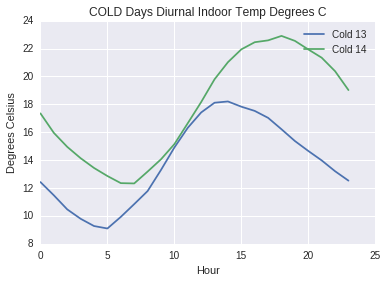

In [133]:
plt.plot(hourlist, featurediurnaldata(df2013cold, 'H02-K-N'))
plt.plot(hourlist, featurediurnaldata(df2014cold, 'H02-K-N'))

plt.legend(['Cold 13', 'Cold 14'])
plt.title('COLD Days Diurnal Indoor Temp Degrees C')
plt.xlabel('Hour')
plt.ylabel('Degrees Celsius')

plt.show()



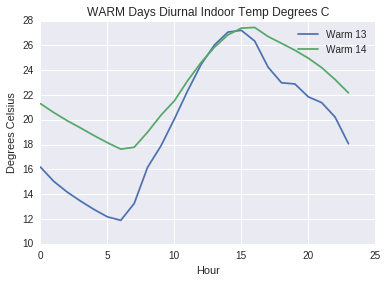

In [134]:
plt.plot(hourlist, featurediurnaldata(df2013warm, 'H02-K-N'))
plt.plot(hourlist, featurediurnaldata(df2014warm, 'H02-K-N'))

plt.legend(['Warm 13', 'Warm 14'])
plt.title('WARM Days Diurnal Indoor Temp Degrees C')
plt.xlabel('Hour')
plt.ylabel('Degrees Celsius')

plt.show()


#### Indoor/Outdoor Temperature Difference

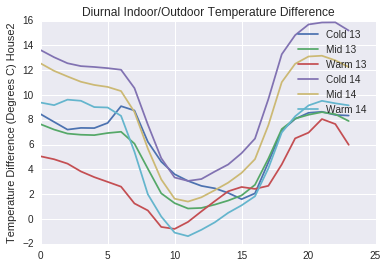

In [135]:
plt.plot(hourlist, featurediurnaldata(df2013cold, 'tempdifference'))
plt.plot(hourlist, featurediurnaldata(df2013mid, 'tempdifference'))
plt.plot(hourlist, featurediurnaldata(df2013warm, 'tempdifference'))
plt.plot(hourlist, featurediurnaldata(df2014cold, 'tempdifference'))
plt.plot(hourlist, featurediurnaldata(df2014mid, 'tempdifference'))
plt.plot(hourlist, featurediurnaldata(df2014warm, 'tempdifference'))
plt.title('Diurnal Indoor/Outdoor Temperature Difference')
plt.legend(['Cold 13', 'Mid 13', 'Warm 13', 'Cold 14', 'Mid 14', 'Warm 14'])
plt.ylabel('Temperature Difference (Degrees C) House2') 
plt.show()

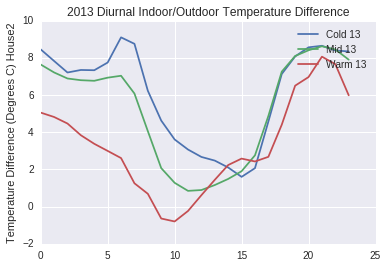

In [137]:
plt.plot(hourlist, featurediurnaldata(df2013cold, 'tempdifference'))
plt.plot(hourlist, featurediurnaldata(df2013mid, 'tempdifference'))
plt.plot(hourlist, featurediurnaldata(df2013warm, 'tempdifference'))
plt.title('2013 Diurnal Indoor/Outdoor Temperature Difference')
plt.legend(['Cold 13', 'Mid 13', 'Warm 13'])
plt.ylabel('Temperature Difference (Degrees C) House2') 
plt.show()

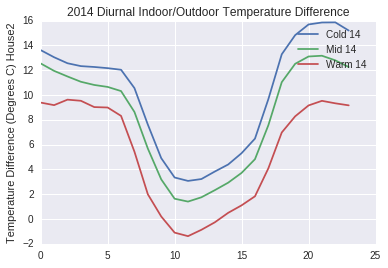

In [138]:
plt.plot(hourlist, featurediurnaldata(df2014cold, 'tempdifference'))
plt.plot(hourlist, featurediurnaldata(df2014mid, 'tempdifference'))
plt.plot(hourlist, featurediurnaldata(df2014warm, 'tempdifference'))
plt.title('2014 Diurnal Indoor/Outdoor Temperature Difference')
plt.legend(['Cold 14', 'Mid 14', 'Warm 14'])
plt.ylabel('Temperature Difference (Degrees C) House2') 
plt.show()

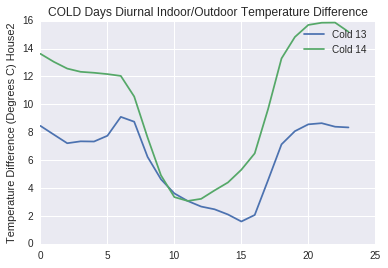

In [139]:
plt.plot(hourlist, featurediurnaldata(df2013cold, 'tempdifference'))
plt.plot(hourlist, featurediurnaldata(df2014cold, 'tempdifference'))
plt.title('COLD Days Diurnal Indoor/Outdoor Temperature Difference')
plt.legend(['Cold 13', 'Cold 14'])
plt.ylabel('Temperature Difference (Degrees C) House2') 
plt.show()

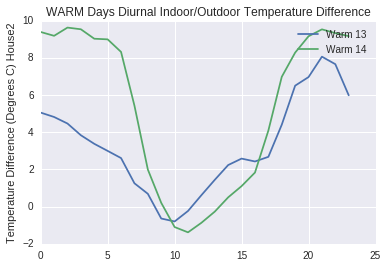

In [140]:
plt.plot(hourlist, featurediurnaldata(df2013warm, 'tempdifference'))
plt.plot(hourlist, featurediurnaldata(df2014warm, 'tempdifference'))
plt.title('WARM Days Diurnal Indoor/Outdoor Temperature Difference')
plt.legend(['Warm 13', 'Warm 14'])
plt.ylabel('Temperature Difference (Degrees C) House2') 
plt.show()

#### PM4

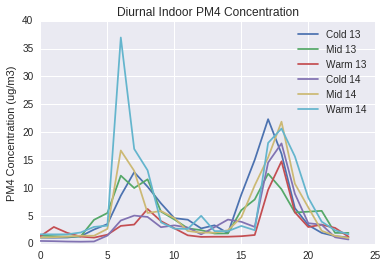

In [141]:
plt.plot(hourlist, featurediurnaldata(df2013cold, 'PM4_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2013mid, 'PM4_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2013warm, 'PM4_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014cold, 'PM4_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014mid, 'PM4_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014warm, 'PM4_(ug/m3)'))
plt.title('Diurnal Indoor PM4 Concentration')
plt.legend(['Cold 13', 'Mid 13', 'Warm 13', 'Cold 14', 'Mid 14', 'Warm 14'])
plt.ylabel('PM4 Concentration (ug/m3)') 
plt.show()


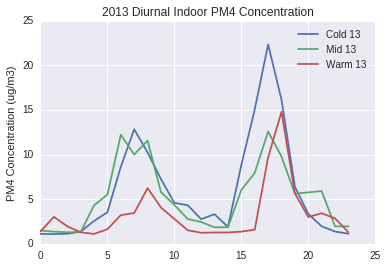

In [142]:
plt.plot(hourlist, featurediurnaldata(df2013cold, 'PM4_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2013mid, 'PM4_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2013warm, 'PM4_(ug/m3)'))
plt.title('2013 Diurnal Indoor PM4 Concentration')
plt.legend(['Cold 13', 'Mid 13', 'Warm 13'])
plt.ylabel('PM4 Concentration (ug/m3)') 
plt.show()


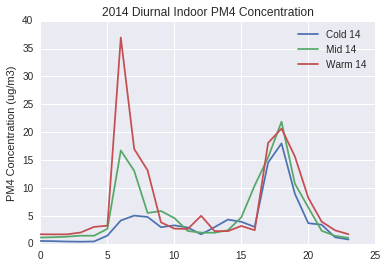

In [143]:
plt.plot(hourlist, featurediurnaldata(df2014cold, 'PM4_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014mid, 'PM4_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014warm, 'PM4_(ug/m3)'))
plt.title('2014 Diurnal Indoor PM4 Concentration')
plt.legend(['Cold 14', 'Mid 14', 'Warm 14'])
plt.ylabel('PM4 Concentration (ug/m3)') 
plt.show()


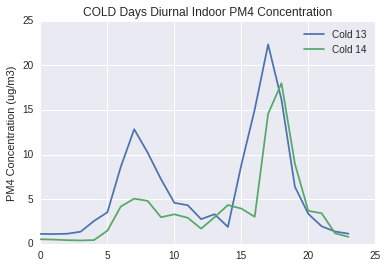

In [144]:
plt.plot(hourlist, featurediurnaldata(df2013cold, 'PM4_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014cold, 'PM4_(ug/m3)'))
plt.title('COLD Days Diurnal Indoor PM4 Concentration')
plt.legend(['Cold 13','Cold 14'])
plt.ylabel('PM4 Concentration (ug/m3)') 
plt.show()


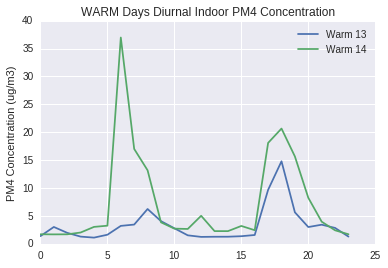

In [145]:
plt.plot(hourlist, featurediurnaldata(df2013warm, 'PM4_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014warm, 'PM4_(ug/m3)'))
plt.title('WARM Days Diurnal Indoor PM4 Concentration')
plt.legend(['Warm 13', 'Warm 14'])
plt.ylabel('PM4 Concentration (ug/m3)') 
plt.show()


#### PM10

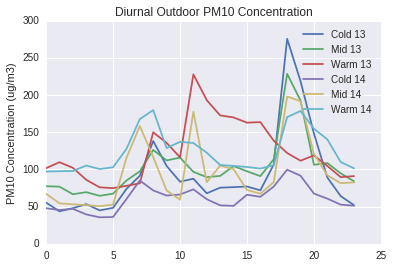

In [148]:
plt.plot(hourlist, featurediurnaldata(df2013cold, 'PM10_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2013mid, 'PM10_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2013warm, 'PM10_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014cold, 'PM10_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014mid, 'PM10_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014warm, 'PM10_(ug/m3)'))
plt.title('Diurnal Outdoor PM10 Concentration')
plt.legend(['Cold 13', 'Mid 13', 'Warm 13', 'Cold 14', 'Mid 14', 'Warm 14'])
plt.ylabel('PM10 Concentration (ug/m3)') 
plt.show()


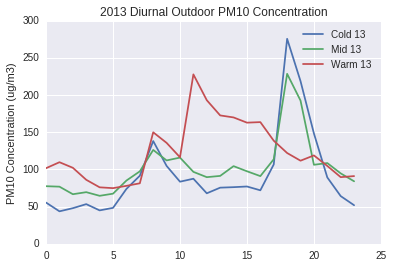

In [149]:
plt.plot(hourlist, featurediurnaldata(df2013cold, 'PM10_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2013mid, 'PM10_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2013warm, 'PM10_(ug/m3)'))
plt.title('2013 Diurnal Outdoor PM10 Concentration')
plt.legend(['Cold 13', 'Mid 13', 'Warm 13'])
plt.ylabel('PM10 Concentration (ug/m3)') 
plt.show()


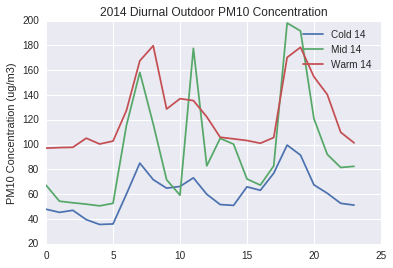

In [150]:
plt.plot(hourlist, featurediurnaldata(df2014cold, 'PM10_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014mid, 'PM10_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014warm, 'PM10_(ug/m3)'))
plt.title('2014 Diurnal Outdoor PM10 Concentration')
plt.legend(['Cold 14', 'Mid 14', 'Warm 14'])
plt.ylabel('PM10 Concentration (ug/m3)') 
plt.show()


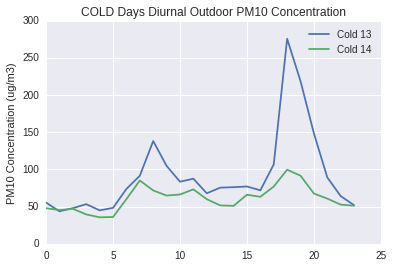

In [151]:
plt.plot(hourlist, featurediurnaldata(df2013cold, 'PM10_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014cold, 'PM10_(ug/m3)'))
plt.title('COLD Days Diurnal Outdoor PM10 Concentration')
plt.legend(['Cold 13', 'Cold 14'])
plt.ylabel('PM10 Concentration (ug/m3)') 
plt.show()


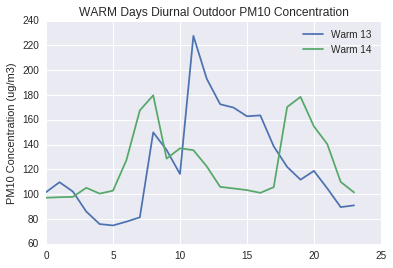

In [152]:
plt.plot(hourlist, featurediurnaldata(df2013warm, 'PM10_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014warm, 'PM10_(ug/m3)'))
plt.title('WARM Days Diurnal Outdoor PM10 Concentration')
plt.legend(['Warm 13','Warm 14'])
plt.ylabel('PM10 Concentration (ug/m3)') 
plt.show()


#### PM2.5

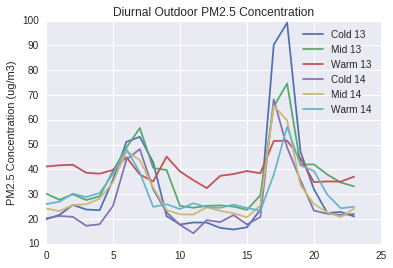

In [153]:
plt.plot(hourlist, featurediurnaldata(df2013cold, 'PM2.5_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2013mid, 'PM2.5_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2013warm, 'PM2.5_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014cold, 'PM2.5_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014mid, 'PM2.5_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014warm, 'PM2.5_(ug/m3)'))
plt.title('Diurnal Outdoor PM2.5 Concentration')
plt.legend(['Cold 13', 'Mid 13', 'Warm 13', 'Cold 14', 'Mid 14', 'Warm 14'])
plt.ylabel('PM2.5 Concentration (ug/m3)') 
plt.show()

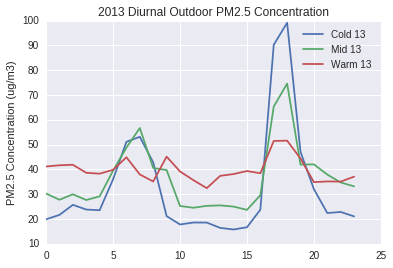

In [154]:
plt.plot(hourlist, featurediurnaldata(df2013cold, 'PM2.5_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2013mid, 'PM2.5_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2013warm, 'PM2.5_(ug/m3)'))
plt.title('2013 Diurnal Outdoor PM2.5 Concentration')
plt.legend(['Cold 13', 'Mid 13', 'Warm 13'])
plt.ylabel('PM2.5 Concentration (ug/m3)') 
plt.show()

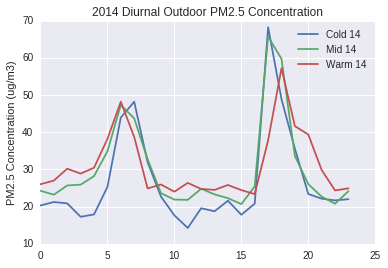

In [155]:
plt.plot(hourlist, featurediurnaldata(df2014cold, 'PM2.5_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014mid, 'PM2.5_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014warm, 'PM2.5_(ug/m3)'))
plt.title('2014 Diurnal Outdoor PM2.5 Concentration')
plt.legend(['Cold 14', 'Mid 14', 'Warm 14'])
plt.ylabel('PM2.5 Concentration (ug/m3)') 
plt.show()

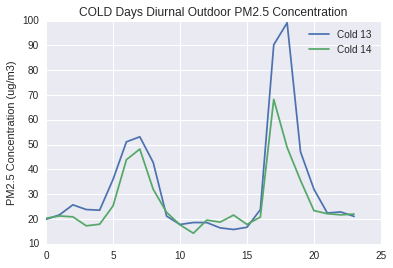

In [156]:
plt.plot(hourlist, featurediurnaldata(df2013cold, 'PM2.5_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014cold, 'PM2.5_(ug/m3)'))
plt.title('COLD Days Diurnal Outdoor PM2.5 Concentration')
plt.legend(['Cold 13', 'Cold 14'])
plt.ylabel('PM2.5 Concentration (ug/m3)') 
plt.show()

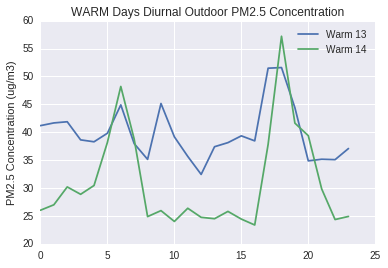

In [157]:
plt.plot(hourlist, featurediurnaldata(df2013warm, 'PM2.5_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014warm, 'PM2.5_(ug/m3)'))
plt.title('WARM Days Diurnal Outdoor PM2.5 Concentration')
plt.legend(['Warm 13','Warm 14'])
plt.ylabel('PM2.5 Concentration (ug/m3)') 
plt.show()

#### CO

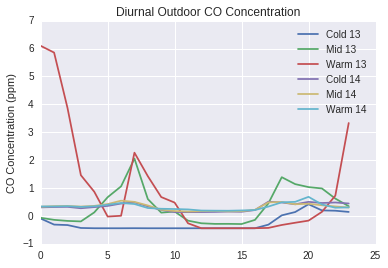

In [158]:
plt.plot(hourlist, featurediurnaldata(df2013cold, 'CO_(ppm)'))
plt.plot(hourlist, featurediurnaldata(df2013mid, 'CO_(ppm)'))
plt.plot(hourlist, featurediurnaldata(df2013warm, 'CO_(ppm)'))
plt.plot(hourlist, featurediurnaldata(df2014cold, 'CO_(ppm)'))
plt.plot(hourlist, featurediurnaldata(df2014mid, 'CO_(ppm)'))
plt.plot(hourlist, featurediurnaldata(df2014warm, 'CO_(ppm)'))
plt.title('Diurnal Outdoor CO Concentration')
plt.legend(['Cold 13', 'Mid 13', 'Warm 13', 'Cold 14', 'Mid 14', 'Warm 14'])
plt.ylabel('CO Concentration (ppm)') 
plt.show()


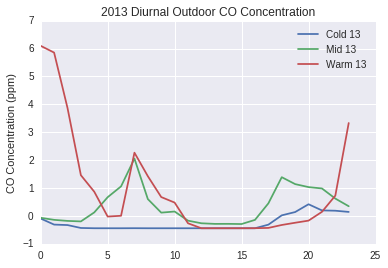

In [159]:
plt.plot(hourlist, featurediurnaldata(df2013cold, 'CO_(ppm)'))
plt.plot(hourlist, featurediurnaldata(df2013mid, 'CO_(ppm)'))
plt.plot(hourlist, featurediurnaldata(df2013warm, 'CO_(ppm)'))
plt.title('2013 Diurnal Outdoor CO Concentration')
plt.legend(['Cold 13', 'Mid 13', 'Warm 13'])
plt.ylabel('CO Concentration (ppm)') 
plt.show()


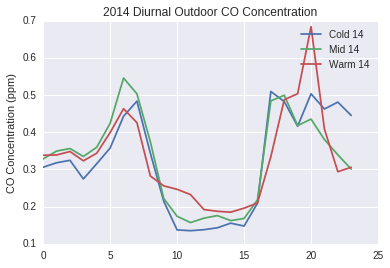

In [160]:
plt.plot(hourlist, featurediurnaldata(df2014cold, 'CO_(ppm)'))
plt.plot(hourlist, featurediurnaldata(df2014mid, 'CO_(ppm)'))
plt.plot(hourlist, featurediurnaldata(df2014warm, 'CO_(ppm)'))
plt.title('2014 Diurnal Outdoor CO Concentration')
plt.legend(['Cold 14', 'Mid 14', 'Warm 14'])
plt.ylabel('CO Concentration (ppm)') 
plt.show()


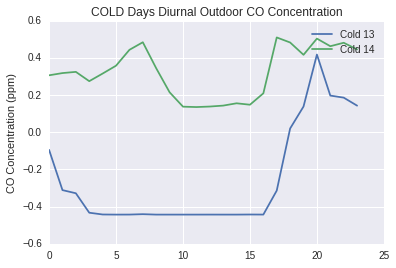

In [161]:
plt.plot(hourlist, featurediurnaldata(df2013cold, 'CO_(ppm)'))
plt.plot(hourlist, featurediurnaldata(df2014cold, 'CO_(ppm)'))
plt.title('COLD Days Diurnal Outdoor CO Concentration')
plt.legend(['Cold 13', 'Cold 14'])
plt.ylabel('CO Concentration (ppm)') 
plt.show()


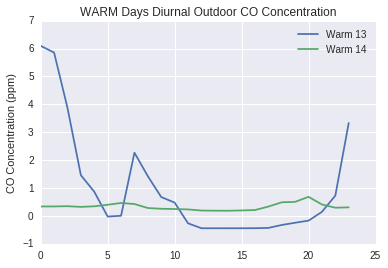

In [162]:
plt.plot(hourlist, featurediurnaldata(df2013warm, 'CO_(ppm)'))
plt.plot(hourlist, featurediurnaldata(df2014warm, 'CO_(ppm)'))
plt.title('WARM Days Diurnal Outdoor CO Concentration')
plt.legend(['Warm 13','Warm 14'])
plt.ylabel('CO Concentration (ppm)') 
plt.show()


CO Data was inconclusive.

### We explored splitting the dataframes up by time of day.
#### The different peaks would give us different information - the evening peak was more becuase of dinner, while the morning peak was caused by making tea but mostly hetating.

#### The graphs below are helpful in visualizing what each time bracket is.  
A, C, and E are the baseline, either middle of the day or middle of the night, when people aren't burning.
B is the morning when people get up, make tea, and heat up their homes.
D is the evening when people make dinner.

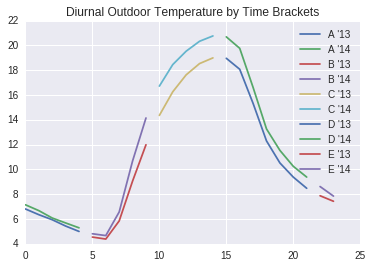

In [165]:
[df2013A, df2013B, df2013C, df2013D, df2013E] = abcdeTimeDataframes(df2013)
[df2014A, df2014B, df2014C, df2014D, df2014E] = abcdeTimeDataframes(df2014)


plt.plot(hourlist, featurediurnaldata(df2013A, 'Temperature_(degC)'))
plt.plot(hourlist, featurediurnaldata(df2014A, 'Temperature_(degC)'))
plt.plot(hourlist, featurediurnaldata(df2013B, 'Temperature_(degC)'))
plt.plot(hourlist, featurediurnaldata(df2014B, 'Temperature_(degC)'))
plt.plot(hourlist, featurediurnaldata(df2013C, 'Temperature_(degC)'))
plt.plot(hourlist, featurediurnaldata(df2014C, 'Temperature_(degC)'))
plt.plot(hourlist, featurediurnaldata(df2013D, 'Temperature_(degC)'))
plt.plot(hourlist, featurediurnaldata(df2014D, 'Temperature_(degC)'))
plt.plot(hourlist, featurediurnaldata(df2013E, 'Temperature_(degC)'))
plt.plot(hourlist, featurediurnaldata(df2014E, 'Temperature_(degC)'))
plt.legend(["A '13", "A '14", "B '13", "B '14", "C '13", "C '14", "D '13", "D '14", "E '13", "E '14" ])
plt.title('Diurnal Outdoor Temperature by Time Brackets')
plt.show()

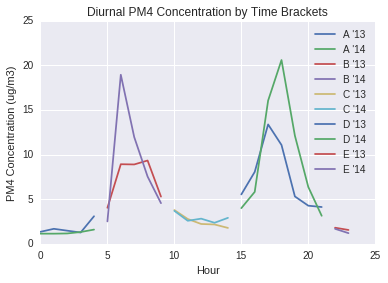

In [167]:
plt.plot(hourlist, featurediurnaldata(df2013A, 'PM4_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014A, 'PM4_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2013B, 'PM4_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014B, 'PM4_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2013C, 'PM4_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014C, 'PM4_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2013D, 'PM4_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014D, 'PM4_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2013E, 'PM4_(ug/m3)'))
plt.plot(hourlist, featurediurnaldata(df2014E, 'PM4_(ug/m3)'))
plt.legend(["A '13", "A '14", "B '13", "B '14", "C '13", "C '14", "D '13", "D '14", "E '13", "E '14" ])
plt.title('Diurnal PM4 Concentration by Time Brackets')
plt.xlabel('Hour')
plt.ylabel('PM4 Concentration (ug/m3)')
plt.show()

# STATISTICAL COMPARISIONS

First we're looking at an analysis of variance between 2014 and 2013 to see how significantly the years differed. We'll look at how the outdoor temperatures varied (as a soft control), then compare the year's pollutant concentrations to get a read for how well the intervention reduced pollution. We'll do this again with diurnal plots to be sure.
Cross correlation will let us track dusttraks vs PM2.5 vs PM10 vs CO concentrations and traking the rise and fall of each pollutant over the course of the entire winter. We're starting by just looking at the entire winter, then we may divide pollution measurements based on temperature deviation of a given day or by month
Kruskal is best for comparing one category of measurement at different time points to see if there is significant variance between those groups. for example: Krusal done on dusttraks from the mean temp track, dusttraks from 1 sd colder than the mean, and dusttraks from 1 sd warmer than the mean. This measurement would tell us if there is variance in pollution between the three groups. This test could also be applied to 2013 vs 2014 dusttraks to find statistical significance in the differences in pollution before and after intervention

## Kruskal Analysis 

#### Outdoor Temperature

##### Comparing Different Time brackets within a given year we see that the Kruskal test shows they are statistically not the same.

In [168]:
print('2013:')
print ('A vs B')
print stats.kruskal(df2013A['Temperature_(degC)'], df2013B['Temperature_(degC)'])
print ('A vs C')
print stats.kruskal(df2013A['Temperature_(degC)'], df2013C['Temperature_(degC)'])
print ('A vs D')
print stats.kruskal(df2013A['Temperature_(degC)'], df2013D['Temperature_(degC)'])
print ('A vs E')
print stats.kruskal(df2013A['Temperature_(degC)'], df2013E['Temperature_(degC)'])
print ('B vs C')
print stats.kruskal(df2013B['Temperature_(degC)'], df2013C['Temperature_(degC)'])
print ('B vs D')
print stats.kruskal(df2013B['Temperature_(degC)'], df2013D['Temperature_(degC)'])
print ('B vs E')
print stats.kruskal(df2013B['Temperature_(degC)'], df2013E['Temperature_(degC)'])
print ('C vs D')
print stats.kruskal(df2013C['Temperature_(degC)'], df2013D['Temperature_(degC)'])
print ('C vs E')
print stats.kruskal(df2013C['Temperature_(degC)'], df2013E['Temperature_(degC)'])
print ('D vs E')
print stats.kruskal(df2013D['Temperature_(degC)'], df2013E['Temperature_(degC)'])


print('')
print('2014')
print ('A vs B')
print stats.kruskal(df2014A['Temperature_(degC)'], df2014B['Temperature_(degC)'])
print ('A vs C')
print stats.kruskal(df2014A['Temperature_(degC)'], df2014C['Temperature_(degC)'])
print ('A vs D')
print stats.kruskal(df2014A['Temperature_(degC)'], df2014D['Temperature_(degC)'])
print ('A vs E')
print stats.kruskal(df2014A['Temperature_(degC)'], df2014E['Temperature_(degC)'])
print ('B vs C')
print stats.kruskal(df2014B['Temperature_(degC)'], df2014C['Temperature_(degC)'])
print ('B vs D')
print stats.kruskal(df2014B['Temperature_(degC)'], df2014D['Temperature_(degC)'])
print ('B vs E')
print stats.kruskal(df2014B['Temperature_(degC)'], df2014E['Temperature_(degC)'])
print ('C vs D')
print stats.kruskal(df2014C['Temperature_(degC)'], df2014D['Temperature_(degC)'])
print ('C vs E')
print stats.kruskal(df2014C['Temperature_(degC)'], df2014E['Temperature_(degC)'])
print ('D vs E')
print stats.kruskal(df2014D['Temperature_(degC)'], df2014E['Temperature_(degC)'])

2013:
A vs B
KruskalResult(statistic=242.36573583120639, pvalue=1.1991674572957914e-54)
A vs C
KruskalResult(statistic=15270.320913598514, pvalue=0.0)
A vs D
KruskalResult(statistic=11094.903190621222, pvalue=0.0)
A vs E
KruskalResult(statistic=620.04055073571988, pvalue=7.3271910777861924e-137)
B vs C
KruskalResult(statistic=12331.220036531144, pvalue=0.0)
B vs D
KruskalResult(statistic=6638.677234465049, pvalue=0.0)
B vs E
KruskalResult(statistic=18.173190667393019, pvalue=2.016982237069756e-05)
C vs D
KruskalResult(statistic=5056.3628836190637, pvalue=0.0)
C vs E
KruskalResult(statistic=9696.6871434795612, pvalue=0.0)
D vs E
KruskalResult(statistic=4977.6297028138952, pvalue=0.0)

2014
A vs B
KruskalResult(statistic=1151.7167179543976, pvalue=1.9001299129319651e-252)
A vs C
KruskalResult(statistic=29255.570493988242, pvalue=0.0)
A vs D
KruskalResult(statistic=20794.793448696597, pvalue=0.0)
A vs E
KruskalResult(statistic=1287.554111955254, pvalue=5.726610957213861e-282)
B vs C
Krusk

In [169]:
 
print('2013 vs 2014')
print ('A')
print stats.kruskal(df2013A['Temperature_(degC)'], df2014A['Temperature_(degC)'])
print ('B')
print stats.kruskal(df2013B['Temperature_(degC)'], df2014B['Temperature_(degC)'])
print ('C')
print stats.kruskal(df2013C['Temperature_(degC)'], df2014C['Temperature_(degC)'])
print ('D')
print stats.kruskal(df2013D['Temperature_(degC)'], df2014D['Temperature_(degC)'])
print ('E')
print stats.kruskal(df2013E['Temperature_(degC)'], df2014E['Temperature_(degC)'])

2013 vs 2014
A
KruskalResult(statistic=811.26807165503942, pvalue=1.9151409789060449e-178)
B
KruskalResult(statistic=423.56903055839859, pvalue=4.0795502265722341e-94)
C
KruskalResult(statistic=3.1139733181302316, pvalue=0.077623383568087775)
D
KruskalResult(statistic=464.0996145871365, pvalue=6.1624418293675769e-103)
E
KruskalResult(statistic=227.01060383265539, pvalue=2.674842547934165e-51)


##### Comparing time of day brackets between 2013 and 2014, unfortunately the only one with a kruskal value of above 0.05, the cutoff below which differences between some of the medians are statistically significant, was the C time range, which represents a baseline temp for midday.  
This means that we can't say the outdoor temperature conditions were similar enough for variation to not be due to chance for any of the other time brackets, and thus comparing the other features will not be useful using the time brackets.

### Without time brackets - Compare cold days

In [171]:
### Compare Cold Days 2014 and Cold Days 2014 Dataframes

#Every data point
stats.kruskal(df2013cold['Temperature_(degC)'], df2014cold['Temperature_(degC)'])
## This shows that looking at all data points we can't say temperature conditions were similar enough 
#for variation to not be due to chance

KruskalResult(statistic=1.7425261711329514, pvalue=0.1868190622368987)

In [172]:
#Daily Averages
stats.kruskal(df2013cold.DailyAverageTemp, df2014cold.DailyAverageTemp)

## This shows that looking at all data points we can't say temperature conditions were similar enough 
#for variation to not be due to chance

KruskalResult(statistic=358.4314305382199, pvalue=6.1821208582310176e-80)

In [187]:
#Diurnal Profile
stats.kruskal(featurediurnaldata(df2013cold, 'Temperature_(degC)'), featurediurnaldata(df2014cold, 'Temperature_(degC)'))
## This shows the differences between the medians are not statistically significant, and there is not evidence
# to reject the null hypothesis that variation is not due to chance

KruskalResult(statistic=0.0038265306122298171, pvalue=0.95067515211034936)

##### From this we now know that the diurnal profiles of the cold days are about the same. Becuase of this, if we see diurnal profiles of other features are statistically significantly different, it is significant because the temperatures were the same.

Indoor/Outdoor Temperature Difference IS significantly different between years for the cold day diurnal profiles.
From this p-value we have enough evidence to reject the null hypothesis that variation is not due to chance.

In [188]:
stats.kruskal(featurediurnaldata(df2013cold, 'tempdifference'),featurediurnaldata(df2014cold, 'tempdifference'))

KruskalResult(statistic=9.0629251700680413, pvalue=0.0026084434918926792)

Though the pvalue of this is not low enough to outright reject the null hypothesis that variation is not due to chance, it is low enough, especially compared to that of the temperature profiles that we can conclude that PM4 concentration is different between years for the cold day diurnal profiles.

In [190]:
stats.kruskal(featurediurnaldata(df2013cold, 'PM4_(ug/m3)'), featurediurnaldata(df2014cold, 'PM4_(ug/m3)'))

KruskalResult(statistic=1.7414965986394577, pvalue=0.18694930948364974)

Indoor/Outdoor Temperature Difference IS significantly different between years for the cold day diurnal profiles.
From this p-value we have enough evidence to reject the null hypothesis that variation is not due to chance.

In [191]:
stats.kruskal(featurediurnaldata(df2013cold, 'PM10_(ug/m3)'), featurediurnaldata(df2014cold, 'PM10_(ug/m3)'))

KruskalResult(statistic=6.3282312925170174, pvalue=0.011883077001124228)

We do not have enough evidence to reject the null hypothesis that variation is not due to chance between 2013 and 2014 cold day diurnal profiles for PM2.5

In [184]:
stats.kruskal(featurediurnaldata(df2013cold, 'PM2.5_(ug/m3)'), featurediurnaldata(df2014cold, 'PM2.5_(ug/m3)'))

KruskalResult(statistic=0.71471088435373531, pvalue=0.39788433446946392)

CO concentration IS significantly different between years for the cold day diurnal profiles.
From this p-value we have enough evidence to reject the null hypothesis that variation is not due to chance.

In [194]:
stats.kruskal(featurediurnaldata(df2013cold, 'CO_(ppm)'), featurediurnaldata(df2014cold, 'CO_(ppm)'))

KruskalResult(statistic=27.513900987224144, pvalue=1.5596944215088018e-07)

## Spearman Correlations

The normalize function literally normalizes a dataframe, you just have to be careful you give it only columns with integers that you want to normalize together(ie don't give it DayCounts or another time/date indicator).
A large chunk of our data is nan, to the point where it's actually a bad idea to drop nans and filling any in won't give us meaningful data.We found out that pandas actually does a pretty good job just ignoring nans when performing operations, so we actually stayed away from using numpy and scipy for all the following operations, and stuck to pandas methods.

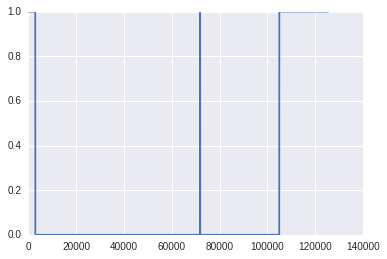

In [202]:
def normalize(df, headers):
    """Normalizes values of a dataframe after filling missing values- see FillMissing
    df: dataframe of un-normalized integer only data
    headers: specifc columns to be compared to one another
    returns: now normalized dataframe of only the specified headers with missing values filled in"""
    normdf = df[headers]
    df_norm = (normdf-normdf.mean())/(normdf.max() - normdf.min())
    return df_norm

intHeadCorrList= [ 'Temperature_(degC)','PM4_(ug/m3)', 'PM10_(ug/m3)','PM2.5_(ug/m3)','SO2_(ppb)','CO_(ppm)','NO_(ppb)',
                 'NO2_(ppb)','AvgHouse']
plt.plot(df2013[intHeadCorrList[0:1]].isnull().mean(axis=1))
dfnorm13 = normalize(df2013, intHeadCorrList)

We chose a spearman correlation because it doesn't rely on the parameters a perason's correlation does. The pandas methof dataframe.corr let us pick spearman, ignores nans (a must have) and constructs a useful dataframe of correlation coefficients that just make the whole matrix process a lot less painful.


In [203]:
speardf = dfnorm13.corr(method = 'spearman')
print speardf.head()

                    Temperature_(degC)  PM4_(ug/m3)  PM10_(ug/m3)  \
Temperature_(degC)            1.000000     0.025234      0.320008   
PM4_(ug/m3)                   0.025234     1.000000      0.388485   
PM10_(ug/m3)                  0.320008     0.388485      1.000000   
PM2.5_(ug/m3)                 0.012230     0.349414      0.353744   
SO2_(ppb)                     0.375853     0.280002      0.455247   

                    PM2.5_(ug/m3)  SO2_(ppb)  CO_(ppm)  NO_(ppb)  NO2_(ppb)  \
Temperature_(degC)       0.012230   0.375853 -0.252044  0.083755   0.172606   
PM4_(ug/m3)              0.349414   0.280002  0.137353  0.389796   0.278899   
PM10_(ug/m3)             0.353744   0.455247  0.217672  0.268485   0.454548   
PM2.5_(ug/m3)            1.000000   0.162776  0.310283  0.146666   0.291135   
SO2_(ppb)                0.162776   1.000000  0.282189  0.517021   0.717334   

                    AvgHouse  
Temperature_(degC)  0.346387  
PM4_(ug/m3)        -0.112542  
PM10_(ug/m3)     

In [204]:
def correlationHeatmap(corrmat, year = ''):
    """Constructs a heatmap correlation matrix
    corrmat: dataframe of correlation constants
    year: year to which data applies"""
#set up mask to cover upper triangle of the matrix 
    mask = np.zeros_like(speardf, dtype=np.bool)
    mask[np.triu_indices_from(mask, k=1)] = True

# Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
    sns.heatmap(corrmat,mask=mask, vmax=.8, square=True)

    plt.title('Winter of '+ year+ ' Temperature and Pollutant Correlations')
    plt.xticks(rotation=30)
    f.tight_layout()

This code for a cross correlation heatmap taken from some helpful seaborn documentation from stanford: https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html

#### From these maps we can see what features are most strongly correlated

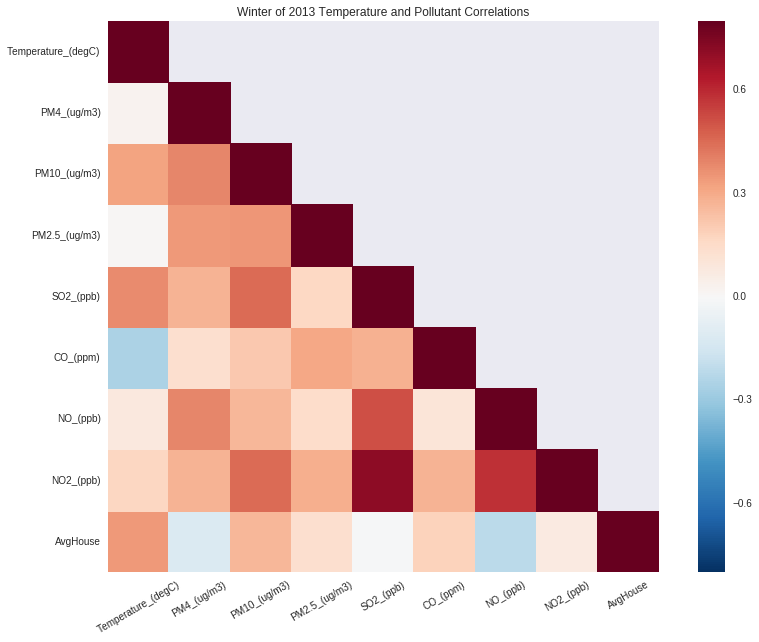

In [205]:
correlationHeatmap(speardf, '2013')


Do this with 2014, cold, warm, hot, and diurnal profiles

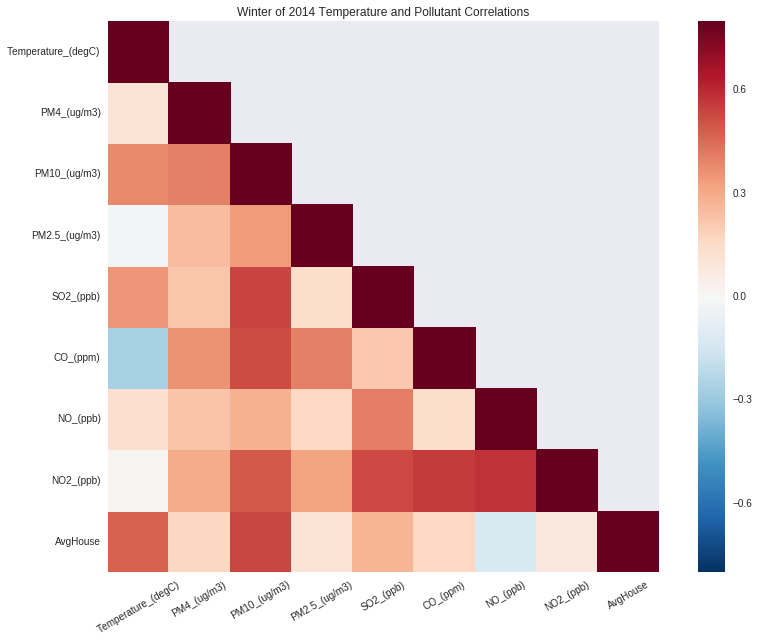

In [206]:
dfnorm14 = normalize(df2014, intHeadCorrList)
speardf14 = dfnorm14.corr(method = 'spearman')
correlationHeatmap(speardf14, '2014')

Difference between temperature brackets

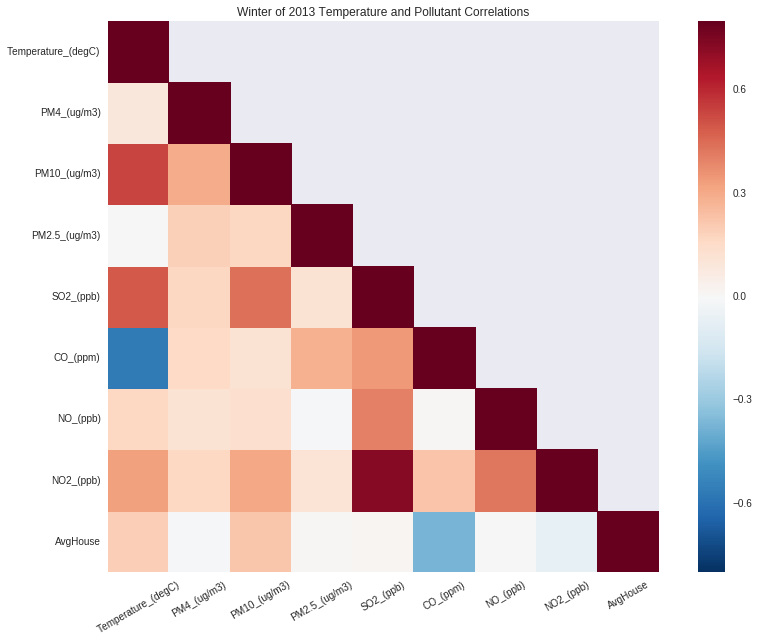

In [208]:
dfnormwarm13 = normalize(df2013warm, intHeadCorrList)
speardfwarm13 = dfnormwarm13.corr(method = 'spearman')
correlationHeatmap(speardfwarm13, '2013')

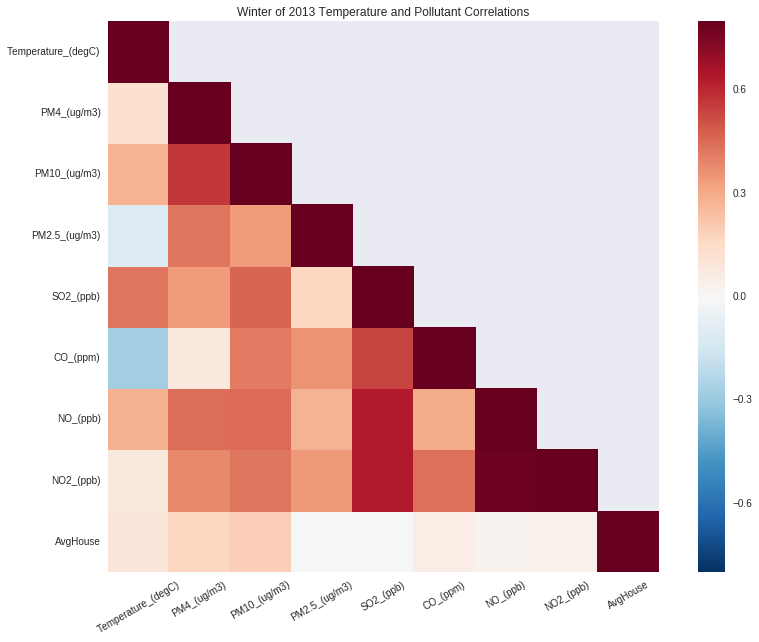

In [209]:
dfnormcold13 = normalize(df2013cold, intHeadCorrList)
speardfcold13 = dfnormcold13.corr(method = 'spearman')
correlationHeatmap(speardfcold13, '2013')

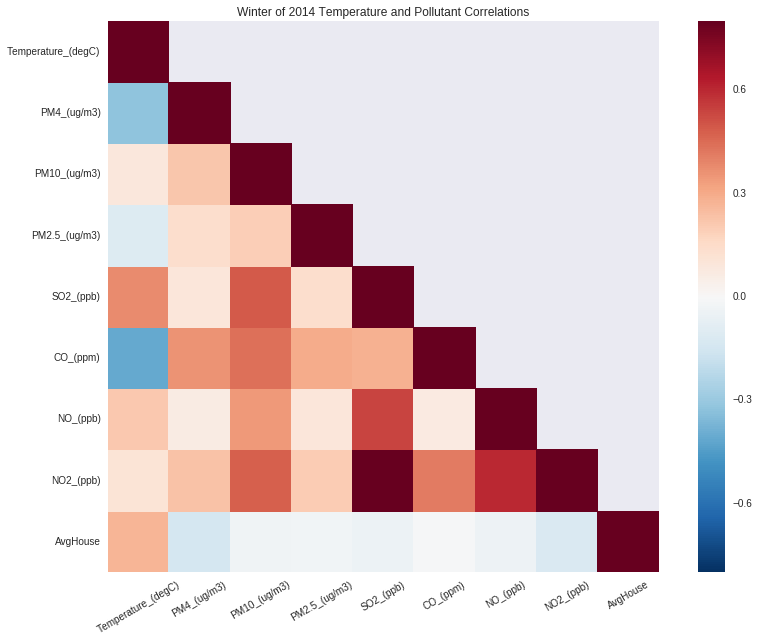

In [210]:

dfnormwarm14 = normalize(df2014warm, intHeadCorrList)
speardfwarm14 = dfnormwarm14.corr(method = 'spearman')
correlationHeatmap(speardfwarm14, '2014')

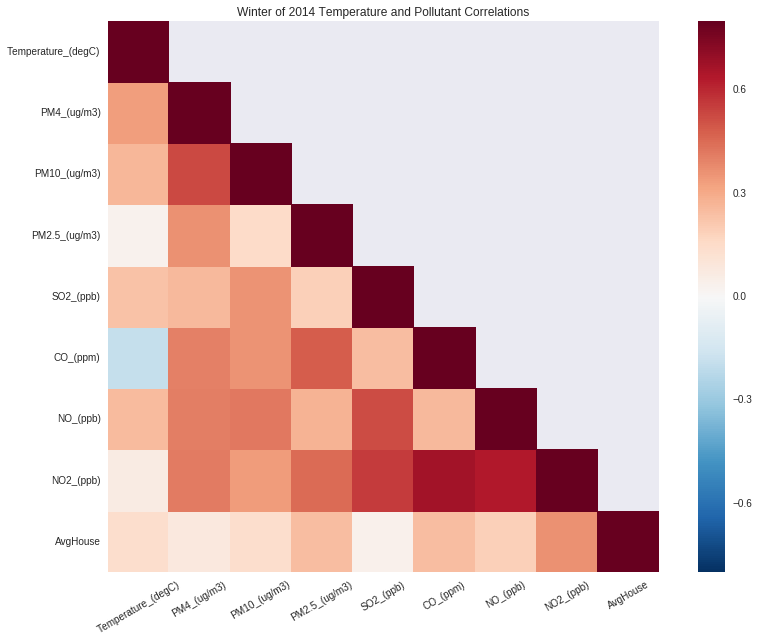

In [211]:
dfnormcold14 = normalize(df2014cold, intHeadCorrList)
speardfcold14 = dfnormcold14.corr(method = 'spearman')
correlationHeatmap(speardfcold14, '2014')